<a href="https://colab.research.google.com/github/mbururyan/Violence-In-Kenya/blob/Main/Meta_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Loading the Relevant Libraries

In [ ]:
# load data.table package
library("data.table")
# load tidyverse package
library("tidyverse")
# install cutr package from github
devtools::install_github("moodymudskipper/cutr")
# load cutr package
library(cutr)
# install modeest package form github
devtools::install_github("paulponcet/modeest")
# load modeest package
library(modeest)
# install moments package
install.packages('moments')
# load moments package
library(moments)
# install janitor package
install.packages('janitor')
# load janitor package 
library(janitor)

Skipping install of 'cutr' from a github remote, the SHA1 (7b8e9cdc) has not changed since last install.
  Use `force = TRUE` to force installation

Skipping install of 'modeest' from a github remote, the SHA1 (a168f944) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Reading the Data

In [ ]:
# loading the csv file 

data <- read.csv(file = '/content/clean_violence_KE.csv')

In [ ]:
# previewing the top of the data
head(data)

,X,EVENT_DATE,YEAR,EVENT_TYPE,PERPRETATORS,VICTIMS,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,SOURCE,FATALITIES
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,1,1997-01-15,1997,Violence against civilians,Police Forces of Kenya (1978-2002),Civilians (Kenya),Kenya,Turkana,Turkana East,Katilia,Suguta Valley,2.16667,36.51667,BBC Monitoring Service: Africa,10
2,2,1997-01-22,1997,Violence against civilians,Police Forces of Kenya (1978-2002),Civilians (International),Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,-0.30000,36.08330,Reuters News,1
3,3,1997-01-23,1997,Violence against civilians,Giriama Ethnic Militia (Kenya),Civilians (Somalia),Kenya,Mombasa,Mvita,Tononoka,Mombasa,-4.05000,39.66667,Reuters News,2
4,4,1997-01-25,1997,Riots/Protests,Protesters (Kenya),Unitentified,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,-0.30000,36.08330,Associated Press International,0
5,5,1997-02-09,1997,Violence against civilians,Police Forces of Kenya (1978-2002),Civilians (Kenya),Kenya,Nyeri,Nyeri Town,Rware,Nyeri,-0.41667,36.95000,Reuters News; Agence France Presse; Associated Press,0
6,6,1997-02-18,1997,Violence against civilians,Unidentified Armed Group (Ethiopia),Civilians (Kenya),Kenya,Turkana,Turkana North,Lake Zone,Todenyang,4.53333,35.93333,BBC Monitoring Service: Africa,8


In [ ]:
# Previewing the bottom of our data

tail(data)

,X,EVENT_DATE,YEAR,EVENT_TYPE,PERPRETATORS,VICTIMS,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,SOURCE,FATALITIES
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
5265,5306,2016-12-22,2016,Riots/Protests,Protesters (Kenya),Unitentified,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1.28333,36.81667,Xinhua,0
5266,5307,2016-12-23,2016,Battle-No change of territory,Police Forces of Kenya (2013-),MRC: Mombasa Republican Council,Kenya,Kwale,Matuga,Tiwi,Kombani,-4.19990,39.58111,Associated Press,1
5267,5308,2016-12-23,2016,Violence against civilians,Al Shabaab,Civilians (Kenya),Kenya,Wajir,Tarbaj,Tarbaj,Tarbaj,2.21645,40.12025,Xinhua,2
5268,5309,2016-12-26,2016,Violence against civilians,Pokot Ethnic Militia (Kenya),Civilians (Kenya),Kenya,Turkana,Turkana Central,Kerio Delta,Kerio,2.98333,36.11667,Daily Nation (Kenya),1
5269,5310,2016-12-28,2016,Violence against civilians,Maasai Ethnic Militia (Kenya),Civilians (Kenya),Kenya,Narok,Kilgoris,Shankoe,Kilgoris,-1.00770,34.88062,Daily Nation (Kenya),1
5270,5311,2016-12-31,2016,Riots/Protests,Rioters (Kenya),Unitentified,Kenya,Kisumu,Kisumu East,Nyamasaria,Nyamasaria,-0.11606,34.78375,Daily Nation (Kenya),0


In [ ]:
# Checking the rows and columns of our data
 dim(data)

[1] 5270   15

* There are 5270 rows and 15 columns. 

## Graphical Visualizations

In [ ]:
# Checking the data types
str(data)

'data.frame':	5270 obs. of  15 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ EVENT_DATE  : chr  "1997-01-15" "1997-01-22" "1997-01-23" "1997-01-25" ...
 $ YEAR        : int  1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 ...
 $ EVENT_TYPE  : chr  "Violence against civilians" "Violence against civilians" "Violence against civilians" "Riots/Protests" ...
 $ PERPRETATORS: chr  "Police Forces of Kenya (1978-2002)" "Police Forces of Kenya (1978-2002)" "Giriama Ethnic Militia (Kenya)" "Protesters (Kenya)" ...
 $ VICTIMS     : chr  "Civilians (Kenya)" "Civilians (International)" "Civilians (Somalia)" "Unitentified" ...
 $ COUNTRY     : chr  "Kenya" "Kenya" "Kenya" "Kenya" ...
 $ ADMIN1      : chr  "Turkana" "Nakuru" "Mombasa" "Nakuru" ...
 $ ADMIN2      : chr  "Turkana East" "Nakuru Town East" "Mvita" "Nakuru Town East" ...
 $ ADMIN3      : chr  "Katilia" "Kivumbini" "Tononoka" "Kivumbini" ...
 $ LOCATION    : chr  "Suguta Valley" "Nakuru" "Mombasa" "Nakuru" ...
 $ LATITUDE 

In [ ]:
# Generating the statistical summaries of the data

summary(data)

       X         EVENT_DATE             YEAR       EVENT_TYPE       
 Min.   :   1   Length:5270        Min.   :1997   Length:5270       
 1st Qu.:1344   Class :character   1st Qu.:2004   Class :character  
 Median :2668   Mode  :character   Median :2008   Mode  :character  
 Mean   :2667                      Mean   :2008                     
 3rd Qu.:3993                      3rd Qu.:2013                     
 Max.   :5311                      Max.   :2016                     
 PERPRETATORS         VICTIMS            COUNTRY             ADMIN1         
 Length:5270        Length:5270        Length:5270        Length:5270       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

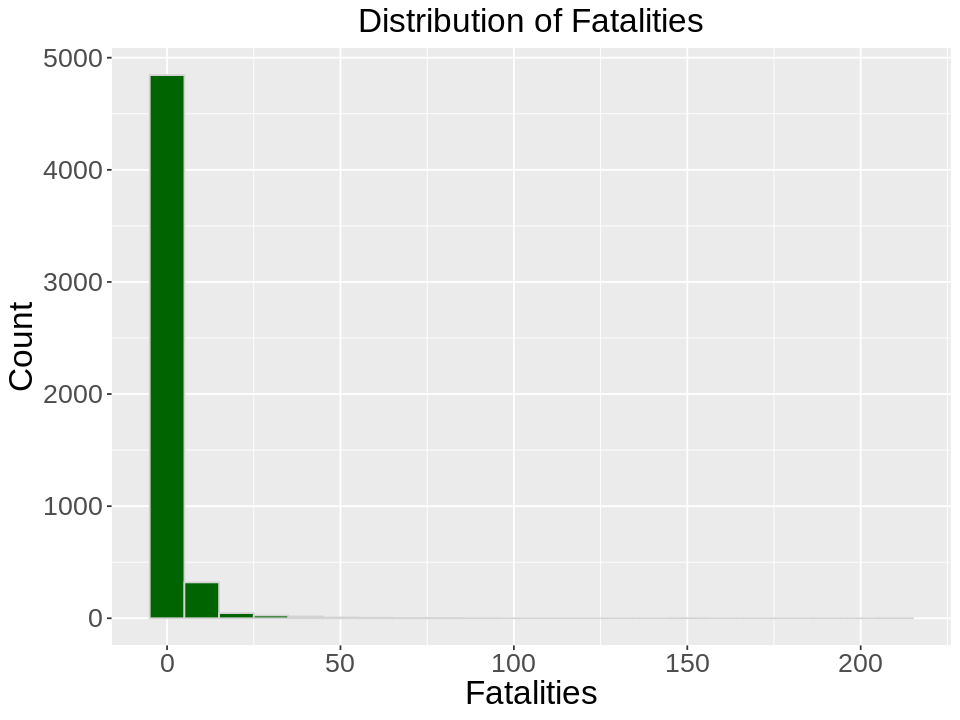

In [ ]:
# Histogram to check distribution of fatalities

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = FATALITIES ))

p + geom_histogram(color="lightgray", fill="dark green", binwidth = 10) +
    labs(title = "Distribution of Fatalities", x = "Fatalities", y = "Count") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

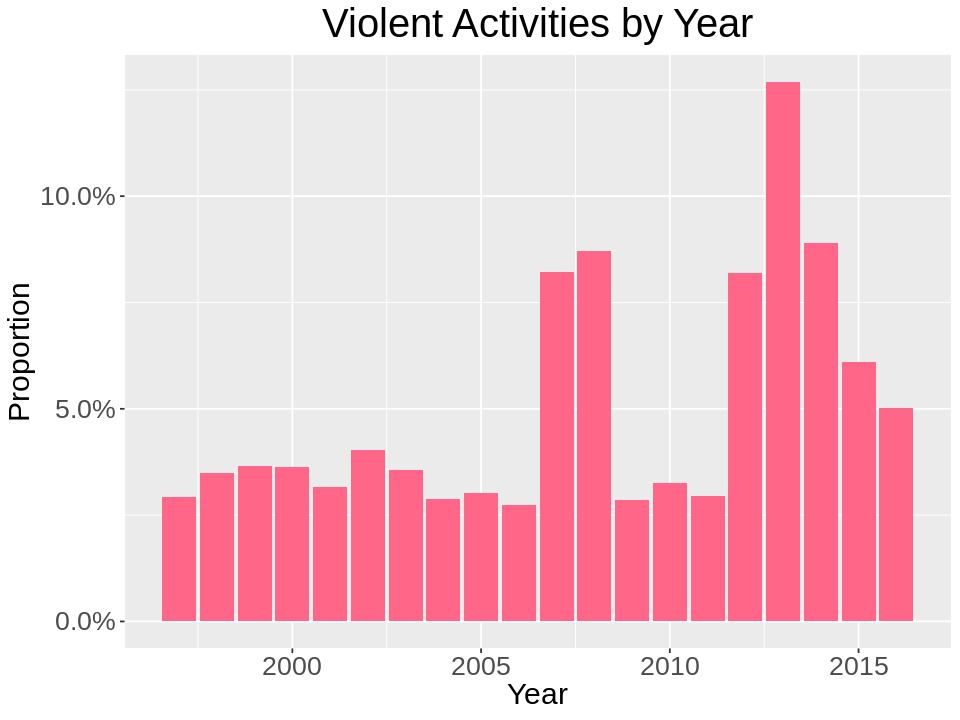

In [ ]:
# Find out which calendar year has had the most number of events in the past 25 years
# Violent activities by year

ggplot(data, aes(YEAR)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6688") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Violent Activities by Year', x='Year', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))


* 2013 reported the highest number of cases. 

NULL

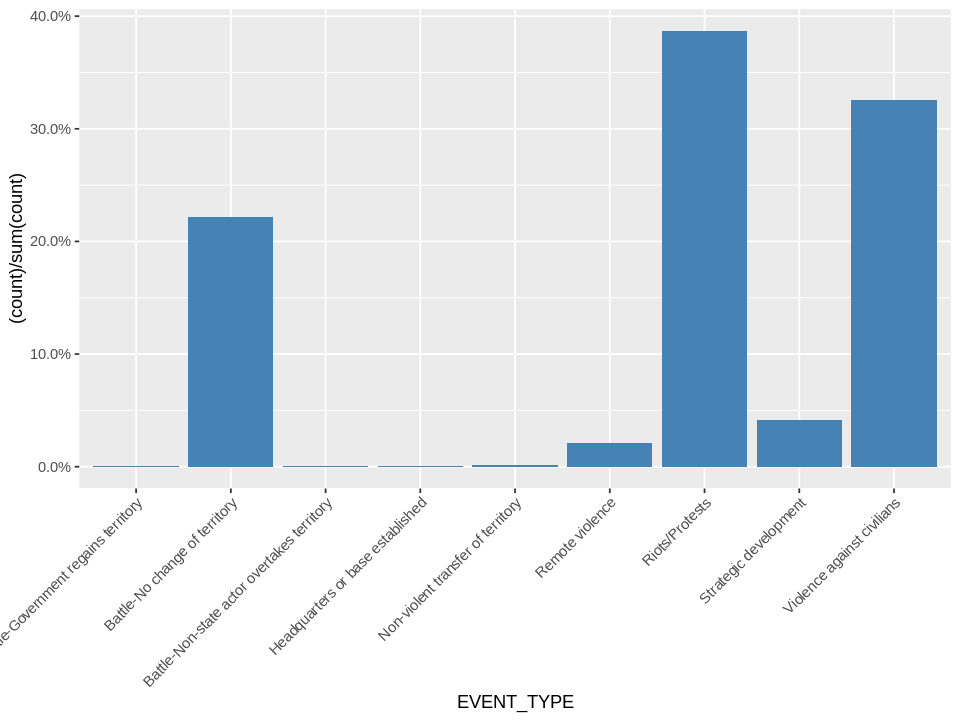

In [ ]:
# What’s the most common type of violence faced by Kenyans
# visualizing event types 

ggplot(data, aes(EVENT_TYPE)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "steelblue") + 
        scale_y_continuous(labels=scales::percent) +   scale_x_discrete(guide = guide_axis(angle = 45))
        labs(title= 'Violent Activities by Year', x='Event Type') + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))

* Riots and protests were the highest recorded type of violent event. 

NULL

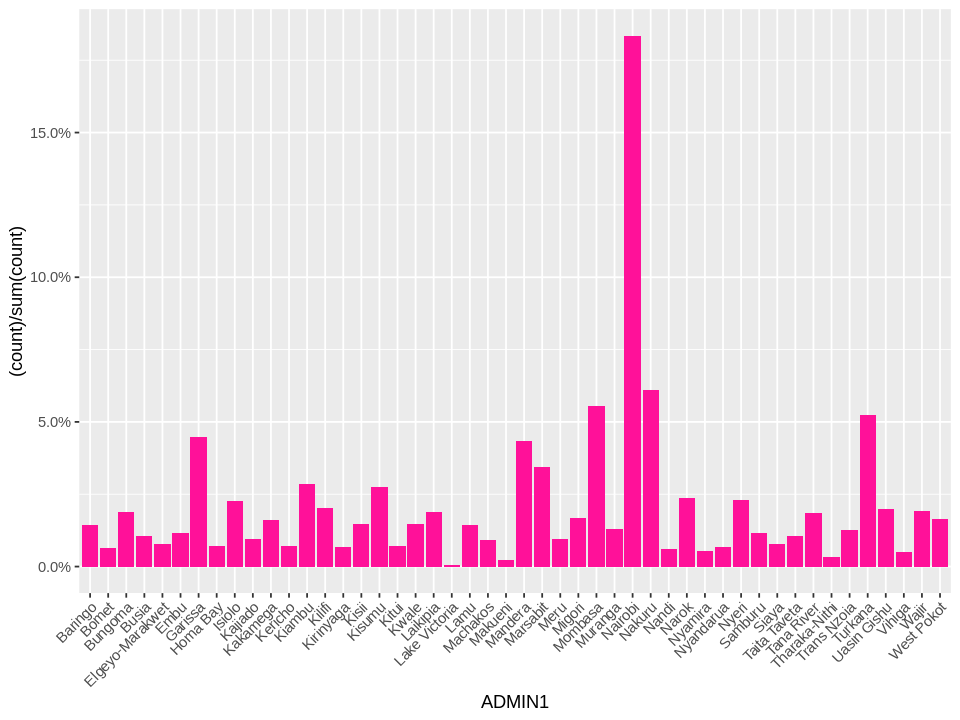

In [ ]:
# Find which county in Kenya has had the most & least number violence events
# visualizing violent events per county
ggplot(data, aes(ADMIN1)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF1199") + 
        scale_y_continuous(labels=scales::percent) +   scale_x_discrete(guide = guide_axis(angle = 45))
        labs(title= 'Violent Activities by Year', x='Event Type') + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))

* Nairobi County recorded the highest number of events while Lake Victoria County recorded the lowest. 

In [ ]:
# Which group is responsible for most violent events
# Frequency table to visualize violent events caused by different groups
data %>% count(PERPRETATORS, sort = TRUE)

PERPRETATORS,n
<chr>,<int>
Protesters (Kenya),1106
Rioters (Kenya),861
Unidentified Armed Group (Kenya),730
Police Forces of Kenya (2002-2013),381
Vigilante Militia (Kenya),181
Police Forces of Kenya (1978-2002),165
Al Shabaab,161
Unidentified Ethnic Militia (Kenya),156
Mungiki Militia,109


* Protesters are resposible for majority of the violent events in Kenya. 